In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# List files in the directory to see the exact CSV file name
print(os.listdir('/kaggle/input/customer-feedback-beauty'))


['csvfile.csv']


In [3]:
df = pd.read_csv('/kaggle/input/customer-feedback-beauty/csvfile.csv')


In [4]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [5]:
df_clean=df.copy()
df_clean = df_clean[['rating', 'title', 'text', 'timestamp']]

# Convert timestamp to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [6]:
df_clean['review_text'] = df['title'] + " " + df['text']
df_clean.head()

,rating,title,text,timestamp,review_text
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,Such a lovely scent but not overpowering. This...
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,Works great but smells a little weird. This pr...
2,5,Yes!,"Smells good, feels great!",2020-05-16 21:41:06.052,"Yes! Smells good, feels great!"
3,1,Synthetic feeling,Felt synthetic,2022-01-28 18:13:50.220,Synthetic feeling Felt synthetic
4,5,A+,Love it,2020-12-30 10:02:43.534,A+ Love it


In [7]:
df_clean.isna().sum()
df_clean.dropna(inplace=True)
df_clean.isna().sum()

rating         0
title          0
text           0
timestamp      0
review_text    0
dtype: int64

In [8]:
df_clean.shape

(701214, 5)

In [9]:
df_new=df_clean.sample(8000)

In [10]:
# some cleaning and analysis

In [11]:
import pandas as pd
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.lower()                  # Convert to lowercase
    return text

df_new['cleaned_review'] = df_new['review_text'].apply(clean_text)


In [12]:
df_new.head()

,rating,title,text,timestamp,review_text,cleaned_review
673247,5,I love these lashes! Very worth buying!,Worth the price!,2021-06-27 05:31:37.085,I love these lashes! Very worth buying! Worth ...,i love these lashes very worth buying worth th...
339036,5,YES! GREAT!!!,GREAT---PERFECTION---VERY SURPRISED!,2017-06-20 08:26:45.383,YES! GREAT!!! GREAT---PERFECTION---VERY SURPRI...,yes great greatperfectionvery surprised
253801,5,Excellent Scrub,Lately I have received my scrub. All I can say...,2021-03-08 02:56:02.881,Excellent Scrub Lately I have received my scru...,excellent scrub lately i have received my scru...
597923,5,Exactly what I was looking for!,This epilator works well and was everything I ...,2013-10-08 19:43:58.000,Exactly what I was looking for! This epilator ...,exactly what i was looking for this epilator w...
67420,5,Sheer but long lasting,The polish is beautiful and bright but be warn...,2022-06-03 16:34:28.569,Sheer but long lasting The polish is beautiful...,sheer but long lasting the polish is beautiful...


In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)


In [14]:
df_new['preprocessed_review'] = df_new['cleaned_review'].apply(preprocess_text)

In [15]:
df_new.head()

,rating,title,text,timestamp,review_text,cleaned_review,preprocessed_review
673247,5,I love these lashes! Very worth buying!,Worth the price!,2021-06-27 05:31:37.085,I love these lashes! Very worth buying! Worth ...,i love these lashes very worth buying worth th...,love lash worth buy worth price
339036,5,YES! GREAT!!!,GREAT---PERFECTION---VERY SURPRISED!,2017-06-20 08:26:45.383,YES! GREAT!!! GREAT---PERFECTION---VERY SURPRI...,yes great greatperfectionvery surprised,yes great greatperfectionvery surprised
253801,5,Excellent Scrub,Lately I have received my scrub. All I can say...,2021-03-08 02:56:02.881,Excellent Scrub Lately I have received my scru...,excellent scrub lately i have received my scru...,excellent scrub lately receive scrub excellent...
597923,5,Exactly what I was looking for!,This epilator works well and was everything I ...,2013-10-08 19:43:58.000,Exactly what I was looking for! This epilator ...,exactly what i was looking for this epilator w...,exactly look epilator work want determine epil...
67420,5,Sheer but long lasting,The polish is beautiful and bright but be warn...,2022-06-03 16:34:28.569,Sheer but long lasting The polish is beautiful...,sheer but long lasting the polish is beautiful...,sheer long last polish beautiful bright warn s...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


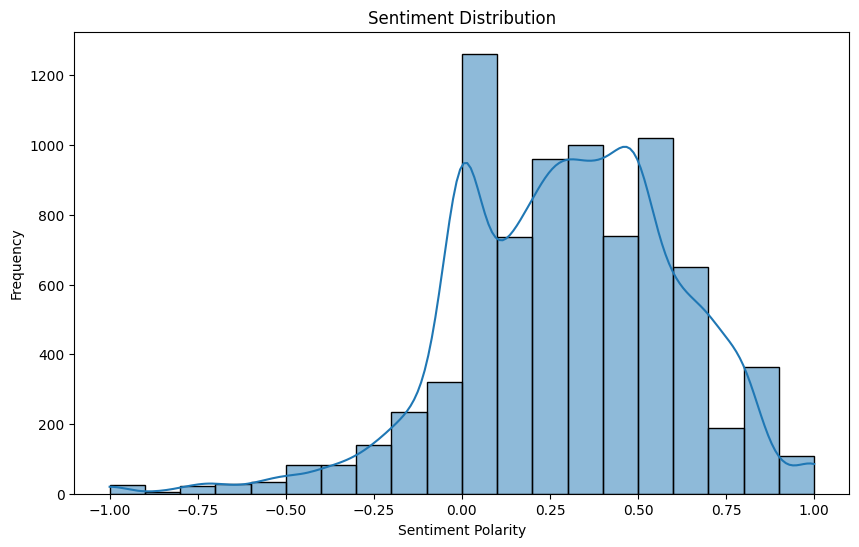

In [16]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_new['sentiment'] = df_new['preprocessed_review'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(df_new['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


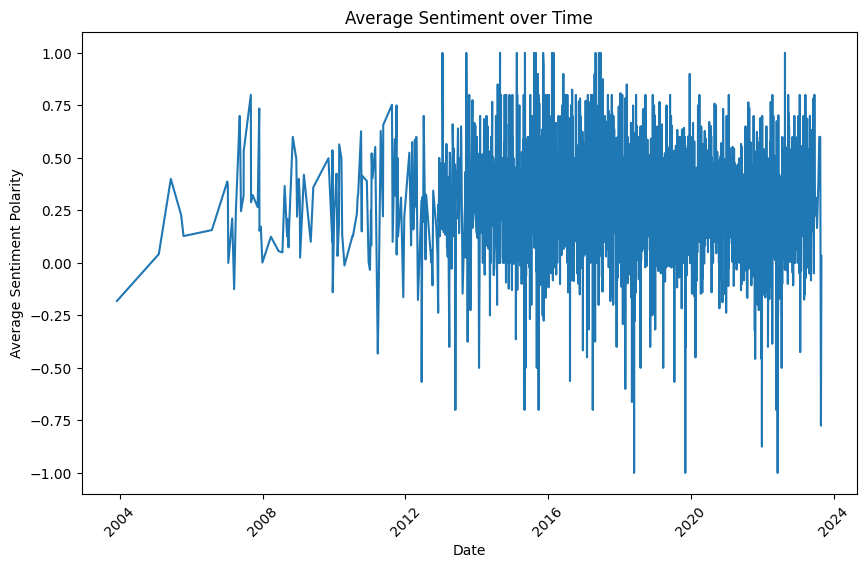

In [17]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])


df_new['date'] = df_new['timestamp'].dt.date

# Plot sentiment trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_new.groupby('date')['sentiment'].mean())
plt.title('Average Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()


In [18]:

df_new_sorted = df_new.sort_values(by='timestamp', ascending=True)
df_new_sorted.head(3)


,rating,title,text,timestamp,review_text,cleaned_review,preprocessed_review,sentiment,date
612175,2,Sorry not a 5 star rating :(,I wish I could rate your product a 5 star. It...,2003-12-02 23:16:39,Sorry not a 5 star rating :( I wish I could ra...,sorry not a star rating i wish i could rate ...,sorry star rating wish rate product star...,-0.181683,2003-12-02
77256,3,Not Bad but Beware,I bought one of these to keep my hair trimmed ...,2005-02-03 02:45:55,Not Bad but Beware I bought one of these to ke...,not bad but beware i bought one of these to ke...,bad beware buy hair trim buzz cut think elimin...,0.041786,2005-02-03
346584,5,This product is great!!!!,While I had a free trial version of this softw...,2005-06-06 20:23:38,This product is great!!!! While I had a free t...,this product is great while i had a free trial...,product great free trial version software comp...,0.400000,2005-06-06


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

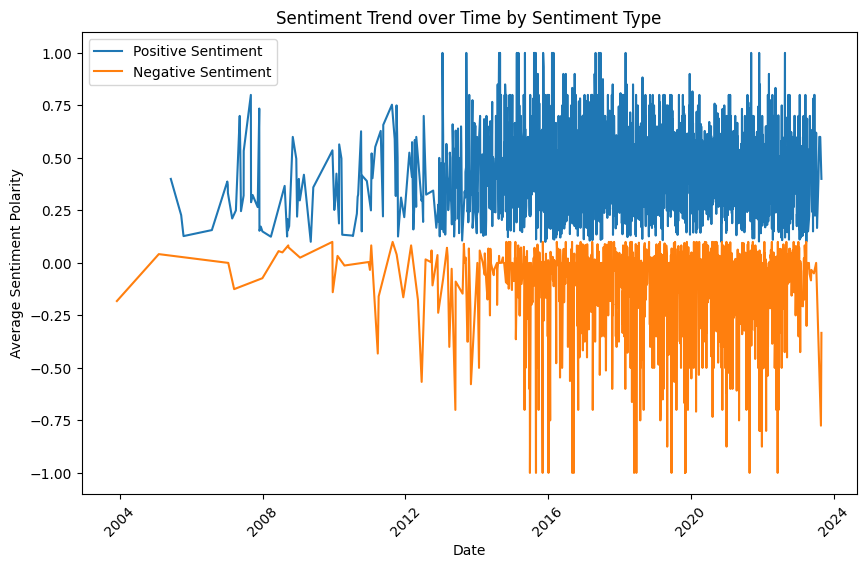

In [19]:
# Assuming 'emotion' or 'sentiment_label' column exists
df_new['date'] = pd.to_datetime(df_new['timestamp']).dt.date

df_positive = df_new[df_new['sentiment'] >0.1]
df_negative = df_new[df_new['sentiment'] <= 0.1]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_positive.groupby('date')['sentiment'].mean(), label='Positive Sentiment')
sns.lineplot(data=df_negative.groupby('date')['sentiment'].mean(), label='Negative Sentiment')
plt.title('Sentiment Trend over Time by Sentiment Type')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.legend()
plt.show()


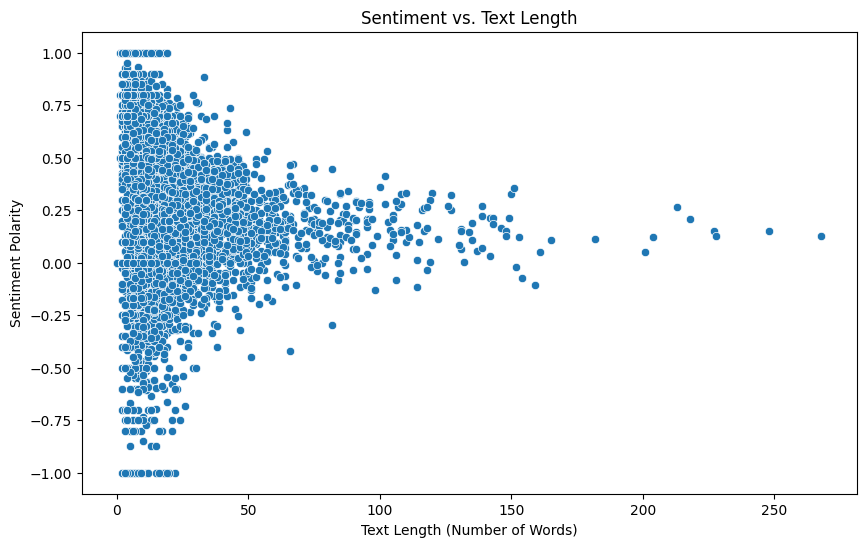

In [20]:
df_new['text_length'] = df_new['preprocessed_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='text_length', y='sentiment')
plt.title('Sentiment vs. Text Length')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Sentiment Polarity')
plt.show()

**Sentiment vs Rating Analysis**

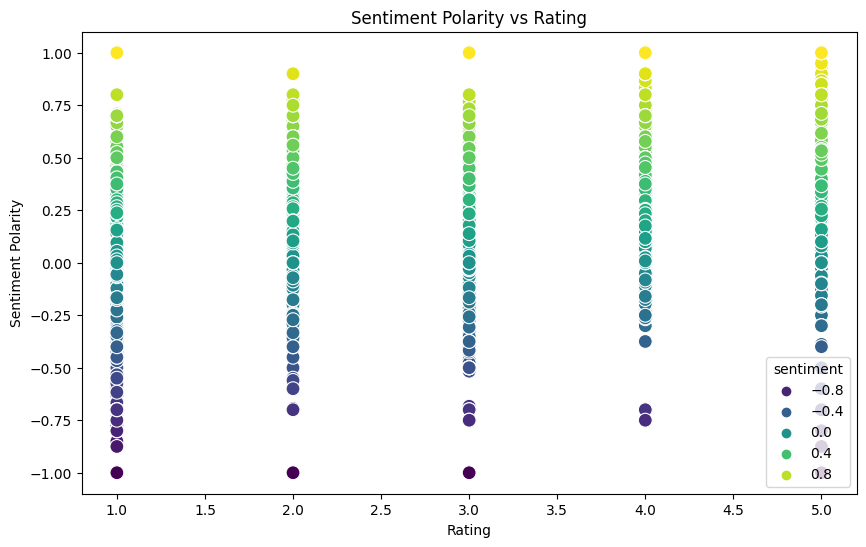

In [21]:
# Scatter plot of polarity vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='rating', y='sentiment', hue='sentiment', palette='viridis', s=100)
plt.title('Sentiment Polarity vs Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()


In [22]:
# even for high rating the sentiment polarity is on the low side and vice-versa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english', max_features=20)
X = vectorizer.fit_transform(df_new['preprocessed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)
keyword_freq = dict(zip(keywords, counts))
keyword1=sorted(keyword_freq.items(),key=lambda x:x[1],reverse=True)
# Display top keywords and frequencies
print("Top Keywords and Frequencies:")
for keyword, freq in keyword1:
    print(f"{keyword}: {freq}")


In [ ]:
from wordcloud import WordCloud

# Join all reviews into a single string
all_words = ' '.join(df_new['preprocessed_review'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Reviews')
plt.show()


In [ ]:
df_new.shape

In [ ]:
df_new.head()

In [23]:
from sklearn.model_selection import train_test_split
import os
import torch
from sklearn.metrics import accuracy_score, f1_score
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

In [25]:
df_new['sentiment']=df_new['rating'].map({1:-1.0,2:-0.5,3:0.0,4:0.5,5:1.0})
df_new['label'] = df_new['sentiment'].apply(lambda x: 1 if x > 0 else 0)

train_data, test_data = train_test_split(df_new, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_data[['preprocessed_review', 'label']])
test_dataset = Dataset.from_pandas(test_data[['preprocessed_review', 'label']])

    # Load the DistilBERT tokenizer and model
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)
def tokenize_function(examples):
    return tokenizer(examples['preprocessed_review'], padding="max_length", truncation=True)

    # Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

    # Define the TrainingArguments
training_args = TrainingArguments(
        output_dir='./results',          # output directory for model checkpoints
        num_train_epochs=6,              # number of training epochs
        per_device_train_batch_size=8,   # batch size for training
        per_device_eval_batch_size=8,
        learning_rate=5e-5,   # Start with a small learning rate and increase it gradually
        lr_scheduler_type="linear",# batch size for evaluation
        warmup_steps=500,                # number of warmup steps for learning rate scheduler
        weight_decay=0.01,               # strength of weight decay
        logging_dir='./logs',            # directory for storing logs
        logging_steps=10,
        evaluation_strategy="epoch",     # evaluate model every epoch
        save_strategy="epoch",           # save model after each epoch
        load_best_model_at_end=True,# load the best model when finished training
        report_to="none" 
    )

    # Define a compute_metrics function to calculate F1 score and accuracy
def compute_metrics(p):
    predictions, labels = p
    predictions = torch.tensor(predictions) if not isinstance(predictions, torch.Tensor) else predictions
    preds = torch.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {'accuracy': accuracy, 'f1': f1}

    # Initialize the Trainer
trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Fine-tune the model
trainer.train()


    # Evaluate the model on the test set
results = trainer.evaluate()
print(f"Test Results: {results}")

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.369800,0.363341,0.841875,0.898921
2,0.382400,0.346758,0.873125,0.915803
3,0.089000,0.484963,0.857500,0.904682
4,0.003400,0.790910,0.853750,0.899743
5,0.056800,0.917954,0.856875,0.903171
6,0.002900,0.928762,0.858125,0.903527


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

Test Results: {'eval_loss': 0.3467584252357483, 'eval_accuracy': 0.873125, 'eval_f1': 0.915802571547076, 'eval_runtime': 17.0896, 'eval_samples_per_second': 93.624, 'eval_steps_per_second': 5.852, 'epoch': 6.0}


In [26]:
MODEL_DIR="./saved_distilbert_model"
trainer.save_model(MODEL_DIR)
tokenizer.save_pretrained(MODEL_DIR)

('./saved_distilbert_model/tokenizer_config.json',
 './saved_distilbert_model/special_tokens_map.json',
 './saved_distilbert_model/vocab.txt',
 './saved_distilbert_model/added_tokens.json')

In [27]:
import shutil
shutil.make_archive("distilbert_model",'zip',MODEL_DIR)

'/kaggle/working/distilbert_model.zip'

In [ ]:
# df1=df_clean.sample(100)

In [ ]:
# df1.shape

In [ ]:
# df1.isna().sum()
# df1['review_text'] = df1['review_text'].fillna('').astype(str)


In [ ]:
# df1['sentiment'] = df1['review_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# # Optionally, if you want to add the score (confidence) as well:
# df1['sentiment_score'] = df1['review_text'].apply(lambda x: sentiment_pipeline(x)[0]['score'])

In [ ]:
# df1.sentiment.value_counts()

In [ ]:
# df1.head()

In [ ]:

import pandas as pd
from transformers import pipeline

# Load the emotion detection model (this model detects emotions like joy, sadness, anger, etc.)
emotion_pipeline = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', 
                            truncation=True, padding=True, max_length=512,device=0)

df2=df_new.copy()



In [ ]:
df2.head()

In [ ]:


# Function to combine emotion classification and rating
def analyze_emotion_and_rating(text, rating):
    # Get emotion prediction from the model
    emotion = emotion_pipeline(text)[0]  # Get top emotion from the model
    label = emotion['label']
    score = emotion['score']
    
    # Adjust sentiment based on rating
    if rating <= 1.5:  # Strongly negative rating (1 or 2)
        # Override emotion to sadness or anger based on rating and context
        label = 'anger' if 'anger' not in label.lower() else 'sadness'
        score = 1.0  # Give maximum confidence for negative sentiment
    elif rating >= 4:  # Strongly positive rating (4 or 5)
        # Override emotion to joy or excitement based on rating and context
        label = 'joy' if 'joy' not in label.lower() else 'excitement'
        score = 1.0  # Give maximum confidence for positive sentiment
    # For rating == 3 (neutral), let the model decide
    return label, score

# Apply the function to each row in the DataFrame
df2['emotion'], df2['emotion_score'] = zip(*df2.apply(lambda row: analyze_emotion_and_rating(row['preprocessed_review'], row['rating']), axis=1))



In [ ]:
# df2=df1.copy()
df2.head()

In [ ]:
df2.emotion_score.value_counts()

In [ ]:
# CUDA_LAUNCH_BLOCKING = "1"
from sklearn.preprocessing import LabelEncoder

# Convert emotion labels to integers
label_encoder = LabelEncoder()
df2['emotion'] = label_encoder.fit_transform(df2['emotion'])


# Now you have 'emotion_encoded' as the target labels


In [ ]:
df2.head()

In [ ]:
df2.isna().sum()

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from transformers import Trainer,TrainingArguments,RobertaTokenizer,RobertaForSequenceClassification



In [ ]:
train_texts,eval_texts,train_labels,eval_labels=train_test_split(df2['preprocessed_review'],df2['emotion'],test_size=0.2,random_state=42)
tokenizer = RobertaTokenizer.from_pretrained('j-hartmann/emotion-english-distilroberta-base')
train_encodings=tokenizer(list(train_texts),truncation=True,padding=True,max_length=128)
eval_encodings=tokenizer(list(eval_texts),truncation=True,padding=True,max_length=128)


class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
       

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx],dtype=torch.long)
        return item

train_labels=train_labels.tolist()
eval_labels=eval_labels.tolist()

train_dataset = EmotionDataset(train_encodings,train_labels)
eval_dataset = EmotionDataset(eval_encodings,eval_labels)

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('j-hartmann/emotion-english-distilroberta-base', num_labels=len(set(train_labels)),ignore_mismatched_sizes=True)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy='epoch',     
    per_device_train_batch_size=8,    # batch size for training
    per_device_eval_batch_size=8,   # batch size for evaluation
    num_train_epochs=3,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,
    report_to="none",  # strength of weight decay

)

In [ ]:
trainer=Trainer(model=model,args=training_args,train_dataset=train_dataset,eval_dataset=eval_dataset)

In [ ]:
trainer.train()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
def compute_metrics(pred):
    predictions,labels = pred
    preds =predictions.argmax(axis=1)  # Get the predicted class IDs
    
    # Compute accuracy
    f1=f1_score(labels,preds,average='weighted')
    accuracy=accuracy_score(labels,preds)
    
    return {'f1': f1,'accuracy':accuracy}
trainer1=Trainer(model=model,args=training_args,train_dataset=train_dataset,eval_dataset=eval_dataset,compute_metrics=compute_metrics)

In [ ]:
trainer1.train()

In [ ]:
eval_results=trainer1.evaluate()

In [ ]:
print(eval_results['eval_f1'],eval_results['eval_accuracy'])